<a href="https://colab.research.google.com/github/fnyh3/Case-Study-Portofolio-Project/blob/main/Fanysia_Helena_assignment_dsf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TITANIC ANALYST**
by Fanysia Helena K.

# **Introduction**
Pada tahun 1912, kapal Titanic mengalami kecelakaan tragis yang menewaskan lebih dari 1.500 penumpang. Analisis data dari manifest penumpang menunjukkan bahwa peluang selamat tidak dibagi secara merata, faktor-faktor seperti jenis kelamin, usia, dan kelas sosial sangat mempengaruhi kemungkinan seseorang untuk bertahan hidup.
Melalui data ini, kita dapat memanfaatkan teknik pembelajaran mesin (machine learning) untuk membangun model prediksi kelangsungan hidup berdasarkan fitur-fitur tertentu.


## **Tujuan:**
1. Untuk mengetahui persentase penumpang yang selamat dari total penumpang.
2. Rata-rata umur penumpang yang selamat.
3. Perbandingan penumpang pria dan wanita yang selamat.



## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

**Check and import data**

In [ ]:
# import data
df = pd.read_excel('titanic.xlsx')
df.head()

,survived,name,sex,age
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000
1,1,"Allison, Master. Hudson Trevor",male,0.9167
2,0,"Allison, Miss. Helen Loraine",female,2.0000
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


In [ ]:
df.tail()

,survived,name,sex,age
495,1,"Mallet, Mrs. Albert (Antoinette Magnin)",female,24.0
496,0,"Mangiavacchi, Mr. Serafino Emilio",male,NaN
497,0,"Matthews, Mr. William John",male,30.0
498,0,"Maybery, Mr. Frank Hubert",male,40.0
499,0,"McCrae, Mr. Arthur Gordon",male,32.0


In [ ]:
#check 10 samples
df.sample(10)

,survived,name,sex,age
453,1,"Hold, Mrs. Stephen (Annie Margaret Hill)",female,29.0
193,1,"Madill, Miss. Georgette Alexandra",female,15.0
188,1,"Lines, Mrs. Ernest H (Elizabeth Lindsey James)",female,51.0
211,0,"Moore, Mr. Clarence Bloomfield",male,47.0
324,1,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0
352,0,"Brown, Mr. Thomas William Solomon",male,60.0
371,1,"Christy, Miss. Julie Rachel",female,25.0
73,1,"Cleaver, Miss. Alice",female,22.0
413,0,"Fynney, Mr. Joseph J",male,35.0
143,1,"Harder, Mr. George Achilles",male,25.0


In [ ]:
#check data type and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  500 non-null    int64  
 1   name      500 non-null    object 
 2   sex       500 non-null    object 
 3   age       451 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


# **Data Observation**
1.   This dataset contains **500 entries** and **4 columns**.
2.   Column **name** and **sex** are categorical, while **age** is numeric.
3.   The survived column is apparently binary **(0,1)**, its meaning will be determined later.
4.   It seems that the entries in the **age** column contain missing.



# **Statistical Summary**

In [ ]:
df.columns

Index(['survived', 'name', 'sex', 'age'], dtype='object')

In [ ]:
# group column names based on type
categorical = ['name', 'sex', 'survived']
numeric = ['age']

In [ ]:
# Syntax numerical statistical summary
df[numeric].describe()

,age
count,451.000000
mean,35.917775
std,14.766454
min,0.666700
25%,24.000000
50%,35.000000
75%,47.000000
max,80.000000


In [ ]:
# Syntax describe method on categorical data
df[categorical].describe()

,survived
count,500.000000
mean,0.540000
std,0.498897
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
categorical

['name', 'sex', 'survived']

In [ ]:
# showing the precise value counts
for col in categorical:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of name column
name
Eustis, Miss. Elizabeth Mussey                                                        2
Becker, Miss. Ruth Elizabeth                                                          1
Becker, Miss. Marion Louise                                                           1
Becker, Master. Richard F                                                             1
Beauchamp, Mr. Henry James                                                            1
Beane, Mrs. Edward (Ethel Clarke)                                                     1
Beane, Mr. Edward                                                                     1
Bateman, Rev. Robert James                                                            1
Banfield, Mr. Frederick James                                                         1
Ball, Mrs. (Ada E Hall)                                                               1
Baimbrigge, Mr. Charles Robert                                                        1

In [ ]:
for col in numeric:
  print(f"==== {col} ====")
  print(df[col].value_counts(), '\n')

==== age ====
age
24.0000    23
30.0000    20
36.0000    19
18.0000    14
42.0000    14
45.0000    14
35.0000    14
22.0000    12
28.0000    12
23.0000    11
21.0000    11
31.0000    11
48.0000    11
25.0000    11
29.0000    10
54.0000    10
50.0000    10
34.0000    10
47.0000    10
39.0000     9
27.0000     9
33.0000     8
49.0000     8
38.0000     8
19.0000     8
40.0000     8
55.0000     8
32.0000     7
60.0000     7
17.0000     7
26.0000     7
44.0000     6
52.0000     6
37.0000     6
58.0000     6
64.0000     5
46.0000     5
57.0000     5
51.0000     5
16.0000     4
53.0000     4
56.0000     4
43.0000     4
62.0000     4
61.0000     4
1.0000      3
8.0000      3
63.0000     3
41.0000     3
15.0000     2
71.0000     2
20.0000     2
65.0000     2
4.0000      2
6.0000      2
2.0000      1
0.9167      1
14.0000     1
11.0000     1
76.0000     1
59.0000     1
80.0000     1
28.5000     1
32.5000     1
70.0000     1
45.5000     1
13.0000     1
67.0000     1
12.0000     1
0.8333      1
0.

# **Observation**
1.   "name" column's value counts might reveal if there are duplicate names or names that provide additional information.
2.   The 'age' column might shows the descriptive statistics like mean, std, min, max, etc.  Further analysis might reveal the age distribution.
3.   The 'sex' column's value counts show the gender ratio on board, which could be relevant to survival analysis.



# **Handling Duplicate**

In [ ]:
len(df)

500

In [ ]:
len(df.drop_duplicates())

499

In [ ]:
len(df.drop_duplicates()) / len(df)

0.998

In [ ]:
list(df.columns)

['survived', 'name', 'sex', 'age']

In [ ]:
duplicates = df[df.duplicated(keep=False)]

In [ ]:
duplicates

,survived,name,sex,age
104,1,"Eustis, Miss. Elizabeth Mussey",female,54.0
349,1,"Eustis, Miss. Elizabeth Mussey",female,54.0


In [ ]:
duplicates.groupby(list(df.columns)).size().reset_index(name='jumlah duplikat')

,survived,name,sex,age,jumlah duplikat
0,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,2


In [ ]:
#Handling Drop duplicate
df = df.drop_duplicates()

In [ ]:
len(df.drop_duplicates()) / len(df)

1.0

Duplikat data telah dihandle

# **Missing data Handling**

In [ ]:
df.isna().sum()

,0
survived,0
name,0
sex,0
age,49


In [ ]:
df.isnull().sum()

,0
survived,0
name,0
sex,0
age,49


In [ ]:
for column in df.columns:
    print(f"============= {column} =================")
    display(df[column].value_counts())
    print()

============= survived =================


,count
survived,
1,269
0,230



============= name =================


,count
name,
"McCrae, Mr. Arthur Gordon",1
"Allen, Miss. Elisabeth Walton",1
"Allison, Master. Hudson Trevor",1
"Lehmann, Miss. Bertha",1
"Laroche, Mrs. Joseph (Juliette Marie Louise Lafargue)",1
"Laroche, Mr. Joseph Philippe Lemercier",1
"Laroche, Miss. Simonne Marie Anne Andree",1
"Laroche, Miss. Louise",1
"Lamb, Mr. John Joseph",1



============= sex =================


,count
sex,
male,288
female,211



============= age =================


,count
age,
24.0000,23
30.0000,20
36.0000,19
18.0000,14
42.0000,14
45.0000,14
35.0000,14
22.0000,12
28.0000,12


In [ ]:
# percentage version
total_rows = len(df)

# Menghitung dan menampilkan persentase missing values di setiap kolom satu per satu
for column in df.columns:
    missing_count = df[column].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"Column '{column}' Has {missing_count} missing values ({missing_percentage:.2f}%)") # .2f means 2 decimal

Column 'survived' Has 0 missing values (0.00%)
Column 'name' Has 0 missing values (0.00%)
Column 'sex' Has 0 missing values (0.00%)
Column 'age' Has 49 missing values (9.82%)


The percentage of missing values below 20% so we handle numerically with median

In [ ]:
df['age'].median()

35.0

In [ ]:
df[column].fillna(df[column].median(), inplace=True)

<ipython-input-34-ed1be7ee2c19>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


In [ ]:
df.isna().sum()

,0
survived,0
name,0
sex,0
age,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  499 non-null    int64  
 1   name      499 non-null    object 
 2   sex       499 non-null    object 
 3   age       499 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 19.5+ KB


Missing values telah dihandle

# **Visualization Data**

In [ ]:
# Hitung total penumpang
total = len(df)

# Hitung jumlah yang selamat (Survived = 1)
selamat = df['survived'].sum()

# Hitung persentase yang selamat
persen_selamat = (selamat / total) * 100

print(f"Jumlah penumpang: {total}")
print(f"Jumlah yang selamat: {selamat}")
print(f"Persentase yang selamat: {persen_selamat:.2f}%")

Jumlah penumpang: 499
Jumlah yang selamat: 269
Persentase yang selamat: 53.91%


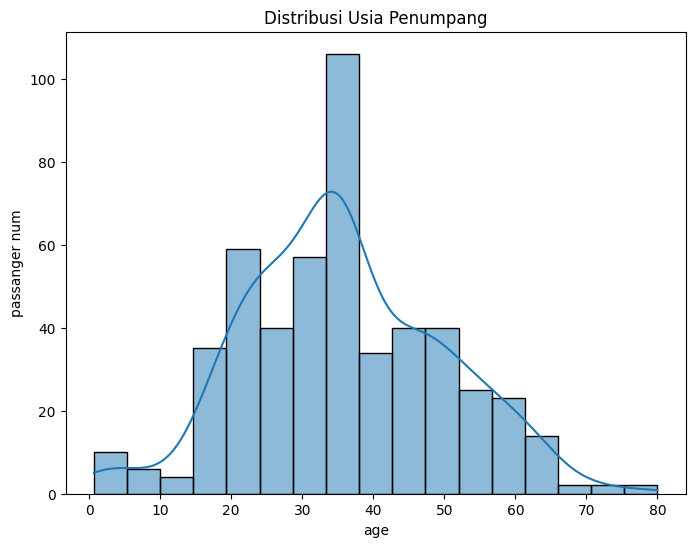

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True)
plt.title('Distribusi Usia Penumpang')
plt.xlabel('age')
plt.ylabel('passanger num')
plt.show()

<ipython-input-52-b881e03fede1>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df.groupby(['age_group', 'survived']).size().unstack()


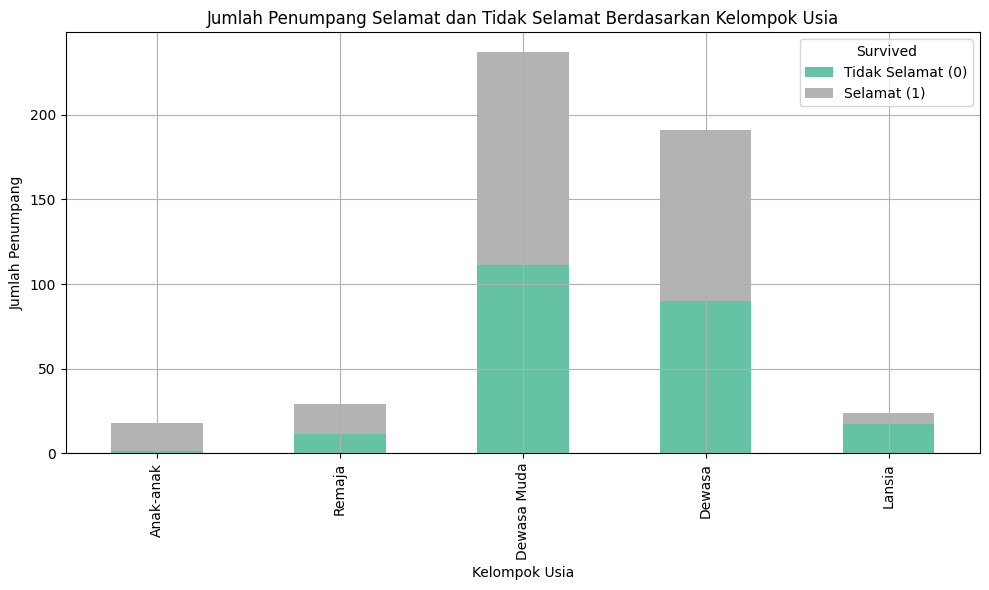

In [ ]:
bins = [0, 12, 18, 35, 60, 100]
labels = ['Anak-anak', 'Remaja', 'Dewasa Muda', 'Dewasa', 'Lansia']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Hitung jumlah survival berdasarkan kelompok usia
age_survival = df.groupby(['age_group', 'survived']).size().unstack()

# Buat bar chart
age_survival.plot(kind='bar', stacked=True, colormap='Set2', figsize=(10,6))
plt.title('Jumlah Penumpang Selamat dan Tidak Selamat Berdasarkan Kelompok Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah Penumpang')
plt.legend(title='Survived', labels=['Tidak Selamat (0)', 'Selamat (1)'])
plt.grid(True)
plt.tight_layout()
plt.show()

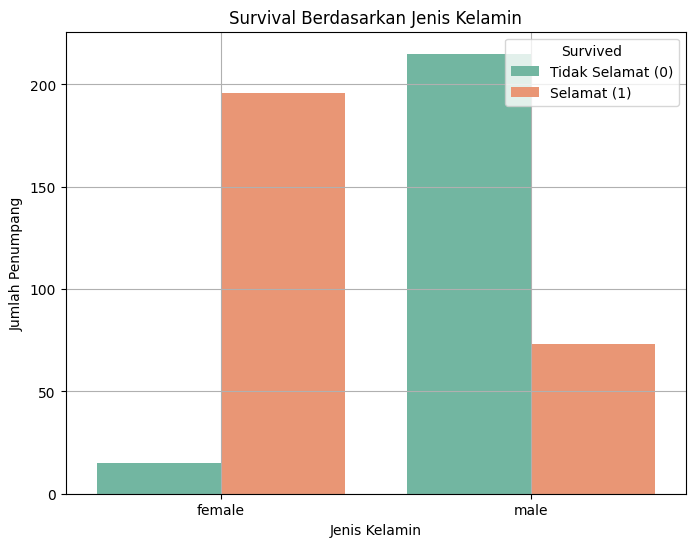

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='sex', hue='survived', palette='Set2')
plt.title('Survival Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Penumpang')
plt.legend(title='Survived', labels=['Tidak Selamat (0)', 'Selamat (1)'])
plt.grid(True)
plt.show()

# **Insight**

Based on the analysis above, we can see that:
1. Most of the passengers who survived were women.
2. The majority of passengers were around 35 years old.
3. Many of the passengers who survived were also around 35 years old.

